# Sep 2017 Analysis of Director Sentiment

## Setup

In [1]:
%matplotlib inline
from collections import defaultdict
from matplotlib import pyplot
from pattern.en import sentiment
from scipy import stats
import csv
import os
import pandas as pd

CODE = 'ASX Code'
NAME = 'Company name'
SECTOR = 'Sector'
STATEMENT = 'Statement'
POLARITY = 'Polarity'
SUBJECTIVITY = 'Subjectivity'
SEASON = 'Season'

COPY_FIELDS = [CODE, NAME, SECTOR]
FIELDNAMES = COPY_FIELDS + [POLARITY, SUBJECTIVITY]

DIR = os.path.expanduser('~/data/facevalue/1709')
IN_FMT = 'directors-reports-{}-20170829.csv'
OUT_FMT = 'directors-reports-{}-20170829-sentiment.csv'
SEASONS = ['MAR2016', 'SEP2016', 'MAR2017', 'SEP2017']

### Read statements

In [2]:
comments = {}
for season in SEASONS:
    ifn = os.path.join(DIR, IN_FMT.format(season))
    with open(ifn) as ifh:
        r = csv.DictReader(ifh)
        comments[season] = list(r)

### Calculate sentiment

In [3]:
sentiments = defaultdict(list)
for season in SEASONS:
    for c in comments[season]:
        row = {k:c[k] for k in COPY_FIELDS}
        s = c[STATEMENT].strip()
        s = '' if s.lower() == 'n/a' else s
        row[POLARITY], row[SUBJECTIVITY] = sentiment(s) if s else (None,None)
        sentiments[season].append(row)

/Users/ben/repos/sentiment/env/lib/python2.7/site-packages/pattern/text/__init__.py:979: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  and tokens[j] in ("'", "\"", u"”", u"’", "...", ".", "!", "?", ")", EOS):
/Users/ben/repos/sentiment/env/lib/python2.7/site-packages/pattern/text/__init__.py:1943: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if w in imap(lambda e: e.lower(), e):


### Save raw sentiment scores

In [4]:
for season in SEASONS:
    ofn = os.path.join(DIR, OUT_FMT.format(season))
    with open(ofn, 'wb') as ofh:
        w = csv.DictWriter(ofh, fieldnames=FIELDNAMES)
        w.writeheader()
        w.writerows(sentiments[season])

### Make data frame

In [5]:
def iter_rows(sentiments):
    for season in SEASONS:
        for s in sentiments[season]:
            row = {SEASON: season}
            row.update(s)
            yield row

df = pd.DataFrame(iter_rows(sentiments))
df

,ASX Code,Company name,Polarity,Season,Sector,Subjectivity
0,AAD,Ardent Leisure Group Stapled,0.046057,MAR2016,Consumer Services,0.366518
1,ABC,Adelaide Brighton,0.145556,MAR2016,Materials,0.406667
2,A2M,The A2 Milk Company,0.223333,MAR2016,"Food, Beverage & Tobacco",0.538333
3,ABP,Abacus Property Group Stapled,0.320833,MAR2016,Real Estate,0.529167
4,AGL,AGL Energy,-0.023611,MAR2016,Utilities,0.229861
5,AHY,Asaleo Care Limited,0.104167,MAR2016,Household & Personal Products,0.512500
6,AMC,AMCOR,0.200000,MAR2016,Materials,0.461111
7,AMP,AMP,0.217045,MAR2016,Insurance,0.471402
8,ANN,Ansell Ltd,0.000808,MAR2016,Health Care Equipment and Services,0.252966
9,APA,APA Group,0.117460,MAR2016,Utilities,0.565476


### Overall descriptive statistics across seasons

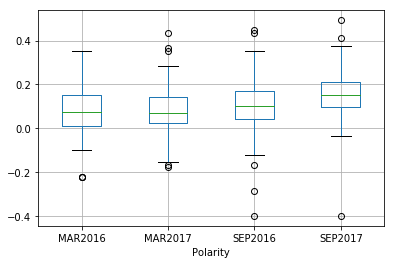

In [6]:
df.boxplot(column='Polarity', by='Season')
pyplot.title('')
pyplot.suptitle('')
pyplot.xlabel('Polarity')

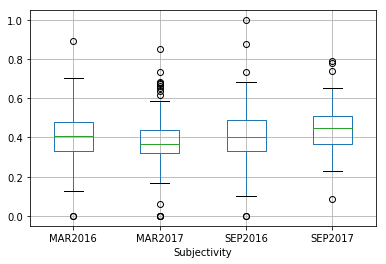

In [7]:
df.boxplot(column='Subjectivity', by='Season')
pyplot.title('')
pyplot.suptitle('')
pyplot.xlabel('Subjectivity')

In [8]:
for season in SEASONS:
    print '{}\n'.format(season)
    print df[df[SEASON]==season].describe()
    print '\n\n'

MAR2016

         Polarity  Subjectivity
count  140.000000    140.000000
mean     0.086138      0.409899
std      0.112681      0.132376
min     -0.221212      0.000000
25%      0.012351      0.329104
50%      0.072869      0.407177
75%      0.149959      0.481023
max      0.350000      0.891667



SEP2016

         Polarity  Subjectivity
count  144.000000    144.000000
mean     0.106095      0.414481
std      0.116052      0.133734
min     -0.400000      0.000000
25%      0.041649      0.333333
50%      0.100571      0.400711
75%      0.167708      0.490975
max      0.450000      1.000000



MAR2017

         Polarity  Subjectivity
count  148.000000    148.000000
mean     0.083812      0.383593
std      0.097850      0.129645
min     -0.176190      0.000000
25%      0.025018      0.321886
50%      0.069387      0.367299
75%      0.144391      0.440195
max      0.433333      0.850000



SEP2017

         Polarity  Subjectivity
count  123.000000    123.000000
mean     0.154307      0.44

### Descriptive statistics by sector

In [9]:
sep16 = df[df[SEASON]=='SEP2016']
sep17 = df[df[SEASON]=='SEP2017']

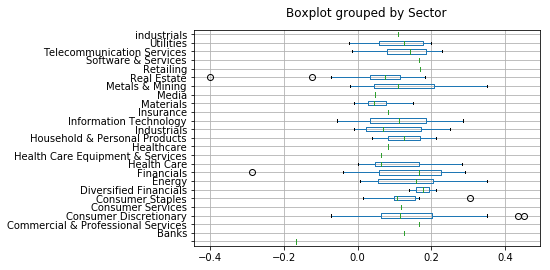

In [10]:
# Polarity grouped by sector for SEP2016
ax = sep16[[SECTOR,POLARITY]].boxplot(by=SECTOR, vert=False)
ax.set_xlabel('')
ax.set_title('')

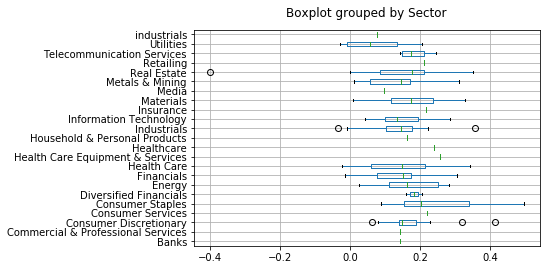

In [11]:
# Polarity grouped by sector for SEP2017
ax = sep17[[SECTOR,POLARITY]].boxplot(by=SECTOR, vert=False)
ax.set_xlabel('')
ax.set_title('')

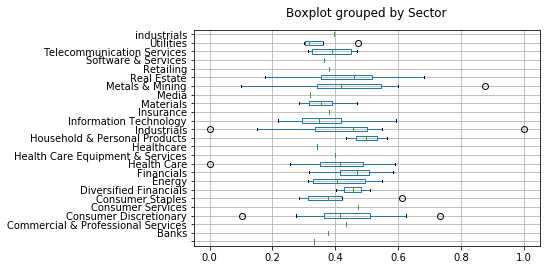

In [12]:
# Subjectivity grouped by sector for SEP2016
ax = sep16[[SECTOR,SUBJECTIVITY]].boxplot(by=SECTOR, vert=False)
ax.set_xlabel('')
ax.set_title('')

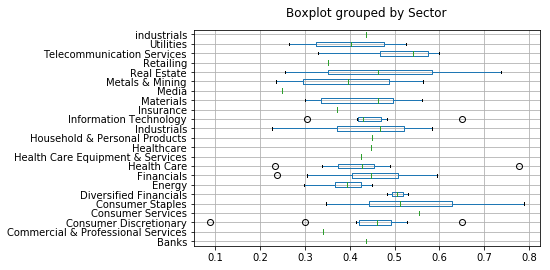

In [13]:
# Subjectivity grouped by sector for SEP2017
ax = sep17[[SECTOR,SUBJECTIVITY]].boxplot(by=SECTOR, vert=False)
ax.set_xlabel('')
ax.set_title('')

### Does sentiment differ by sector?

Can't compute, I believe because some sectors have too few values.

In [14]:
polarities_by_sector = [sep17[sep17[SECTOR]==sector][POLARITY] for sector in sep17[SECTOR].unique()]
stats.kruskal(*polarities_by_sector)

KruskalResult(statistic=nan, pvalue=nan)

In [15]:
subjectivities_by_sector = [sep17[sep17[SECTOR]==sector][SUBJECTIVITY] for sector in sep17[SECTOR].unique()]
stats.kruskal(*subjectivities_by_sector)

KruskalResult(statistic=nan, pvalue=nan)

### Print words for some interesting companies

In [16]:
def iter_words(statement):
    print 'Key words from analysis:'
    for words, polarity, subjectivity, label in sentiment(statement).assessments:
        print '  {:20} (p:{:.3f}, s:{:.3f})'.format(' '.join(words), polarity, subjectivity)
        yield ' '.join(words), polarity, subjectivity

def print_words(code, comments):
    print '{}\n'.format(code)
    for season in SEASONS:
        for c in comments[season]:
            if c[CODE] == code:
                print '{}\n'.format(c[STATEMENT])
                f = os.path.join(DIR, 'example-{}-{}.csv'.format(season, code))
                with open(f, 'w') as fh:
                    w = csv.writer(fh)
                    w.writerows(iter_words(c[STATEMENT]))
                print '\n\n'
                break

In [17]:
EXAMPLES16 = [
    'AMC', # AMCOR - high Materials sentiment of 0.200
    'ABC', # Adelaide Brighton - high Materials sentiment of 0.146
    'RIO', # Rio Tinto - low Materials sentiment of -0.033
    'S32', # South32 - low Materials sentiment of -0.050
    'GPT', # GPT - high Real Estate sentiment of 0.330
    'MGR', # Mirvac - high Real Estate sentiment of 0.247
    'SGP', # Stockland - low Real Estate sentiment of -0.013
    'SCG', # Scentre - low Real Estate sentiment of -0.221
]
for example in EXAMPLES16:
    print_words(example, comments)

AMC

The full year outlook is for higher earnings than the 2014/15 year, expressed in constant currency terms

Key words from analysis:
  full                 (p:0.350, s:0.550)
  higher               (p:0.250, s:0.500)
  constant             (p:0.000, s:0.333)



“The Company is very well positioned for continued growth. The outlook for the 2016-17 year is for higher earnings than the 2015-16 year, expressed in constant currency terms.”

Key words from analysis:
  very                 (p:0.200, s:0.300)
  higher               (p:0.250, s:0.500)
  constant             (p:0.000, s:0.333)



“The Company is very well positioned for continued growth and the outlook for profit after tax in the
2016/17 year has not changed. In constant currency terms, we expect profit after tax to be higher than
the US$671.1 million delivered in the 2015/16 year.” 

Key words from analysis:
  very                 (p:0.200, s:0.300)
  constant             (p:0.000, s:0.333)
  higher               (p:0.250, s

  following            (p:0.000, s:0.100)
  related              (p:0.000, s:0.400)
  expected             (p:-0.100, s:0.400)
  largely              (p:0.214, s:0.429)
  corporate            (p:0.000, s:0.000)
  significantly higher (p:0.250, s:0.500)
  current              (p:0.000, s:0.400)



Consistent with our focus on value over volume, we will continue to take decisive action should superior value and cash flow be attainable by varying the output of any operation.

Key words from analysis:
  consistent           (p:0.250, s:0.250)
  action               (p:0.100, s:0.100)
  superior             (p:0.700, s:0.900)



Production guidance for FY17 is unchanged for our upstream operations. Illawarra Metallurgical Coal saleable production guidance was revised in December 2016 to 7.9Mt as a result of challenging ground conditions at Appin Area 9 and a moderation of mining rates at Appin Area 7 to ensure gas concentrations were maintained at safe levels. With the completion of the 901

### Do polarity and sentiment differ across years?

Yes for polarity, the null hypothesis that means/medians are identical is rejected using Mann-Whitney at p<0.01.

No for subjectivity, the null hypothesis that means/medians are identical is not rejected using t-test/Mann-Whitney.

In [18]:
sep16 = df[df[SEASON]=='SEP2016']
sep17 = df[df[SEASON]=='SEP2017']

In [19]:
print stats.ttest_ind(sep16[POLARITY], sep17[POLARITY])
print stats.mannwhitneyu(sep16[POLARITY], sep17[POLARITY], alternative='two-sided')

Ttest_indResult(statistic=nan, pvalue=nan)
MannwhitneyuResult(statistic=7768.0, pvalue=0.00087367151641207198)


In [20]:
print stats.ttest_ind(sep16[SUBJECTIVITY], sep17[SUBJECTIVITY])
print stats.mannwhitneyu(sep16[SUBJECTIVITY], sep17[SUBJECTIVITY], alternative='two-sided')

Ttest_indResult(statistic=nan, pvalue=nan)
MannwhitneyuResult(statistic=8953.0, pvalue=0.10558872478524878)
